In [1]:
import numpy as np
import pandas, os, astropy, scipy, math
import matplotlib.pyplot as plt
import sklearn
from photutils.aperture import CircularAperture, SkyCircularAperture, aperture_photometry, EllipticalAperture, SkyEllipticalAperture
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
from astropy.visualization import simple_norm
from astropy.wcs.utils import pixel_to_skycoord
import astropy.io.fits as fits
from reproject import reproject_interp
import img_scale
from mpl_toolkits.axes_grid1 import Divider, Size
from astropy.cosmology import FlatLambdaCDM 
from astropy.wcs.utils import proj_plane_pixel_scales

In [103]:
# Writing a function to calculate the magnitude difference bewteen the largest 3 objects
def max_mag_diff(magar):
    lstmag = magar.tolist()
    sortedlstmag = sorted(lstmag)
    magdif1 = sortedlstmag[-1] - sortedlstmag[-2]
    magdif2 = sortedlstmag[-2] - sortedlstmag[-3]
    print(" The magnitude difference between the brightest and 2nd brightest object is {}".format(magdif1))
    print(" The magnitide difference between the 2nd brightest and the 3rd brighest object is {}".format(magdif2))




# Finding the NSC for SMDG1048131+115807(ID = 0)

In [2]:
galcenx0 = 2183.5457595291505
galceny0 = 3244.685526523298
cut_cat0 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/0_SMDG1048131+115807_cut_catalog.csv')


In [3]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal0 = cut_cat0['xc'].to_numpy()
ycgal0 = cut_cat0['yc'].to_numpy()
f606mag0 = cut_cat0['F606W_mag_vega'].to_numpy()
f814mag0 = cut_cat0['F814W_mag_vega'].to_numpy()


In [4]:
#calculating the distance from the centre of the galaxy for each bright object
distgal0 = np.sqrt((xcgal0 - galcenx0)**2 + (ycgal0 - galceny0)**2)


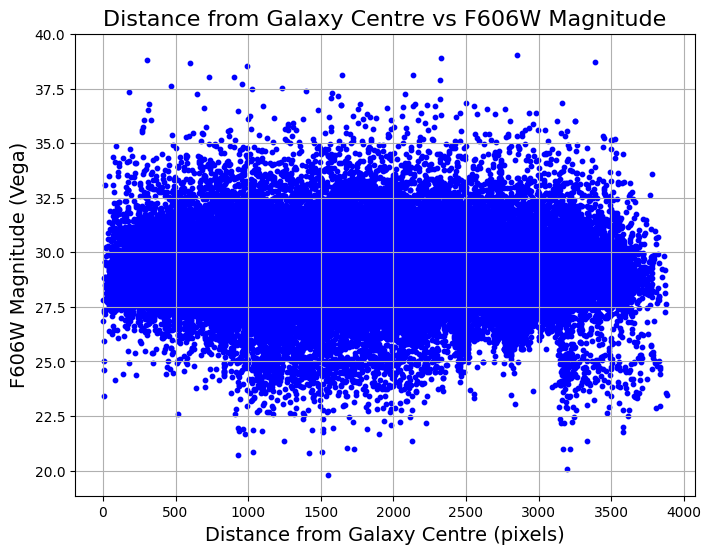

In [5]:
#plotting distance vs magnitude for F606W filter
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

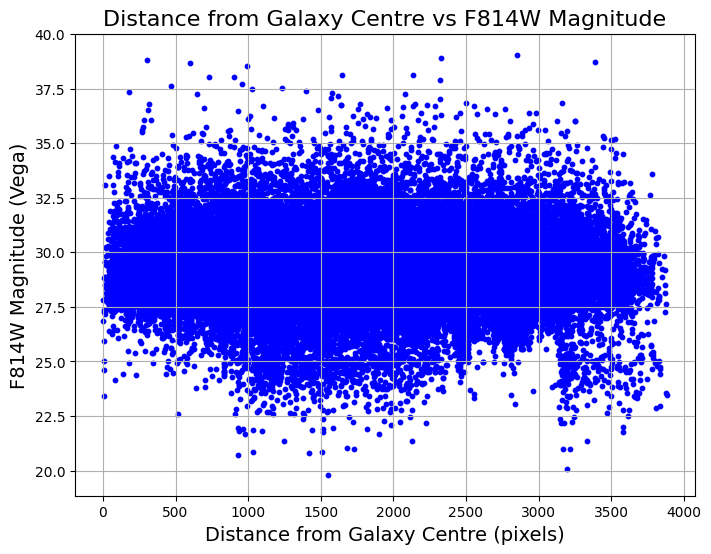

In [6]:
#plotting the distance vs magnitude for F814W filter
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

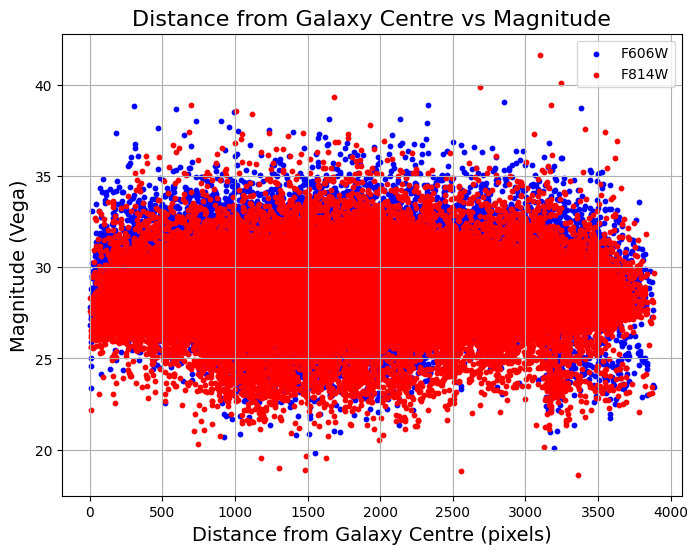

In [7]:
#plotting distance vs magnitude for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10, label='F606W')
plt.scatter(distgal0, f814mag0, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [105]:
# converting pixel in re(arcsec) to pixels
re_arcsec0 = 9.31

hdul0 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_0_F814/MAST_2025-11-09T22_49_51.321Z/HST/jd5h07020_drc.fits')
if len(hdul0) > 1:
    hdr0 = hdul0[1].header
else:
    hdr0 = hdul0[0].header
wcs0 = WCS(hdr0)
pixel_scale_degrees0 = proj_plane_pixel_scales(wcs0)
scale_arcsec_per_pixel0 = pixel_scale_degrees0[0] * 3600
scale_pixel_per_arcsec0 = 1 / scale_arcsec_per_pixel0
re_pixels0 = re_arcsec0 * scale_pixel_per_arcsec0
print(re_pixels0)

186.2000000000001


In [9]:
#refining the bright object list to only include objects within re and finding the colour of the objects
distgal_re0 = distgal0[distgal0 <= re_pixels0]
f606mag_re0 = f606mag0[distgal0 <= re_pixels0]
f814mag_re0 = f814mag0[distgal0 <= re_pixels0]
color0 = f606mag_re0 - f814mag_re0 

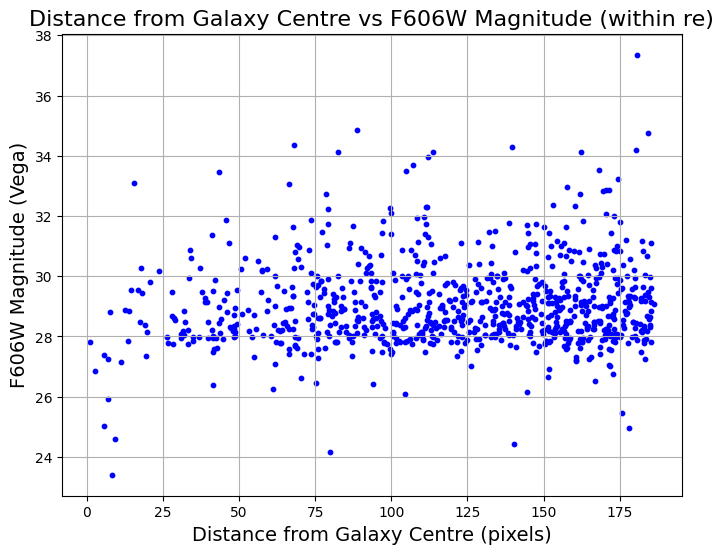

In [10]:
#plotting distance vs magnitude for f606w in re 
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f606mag_re0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

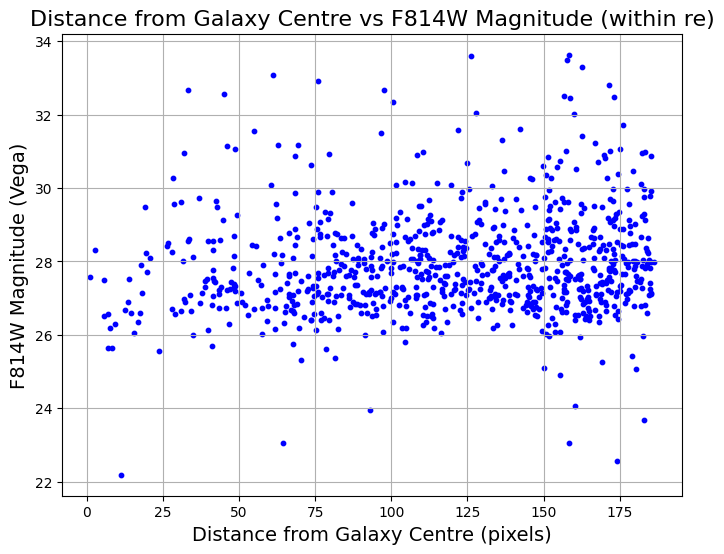

In [11]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f814mag_re0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

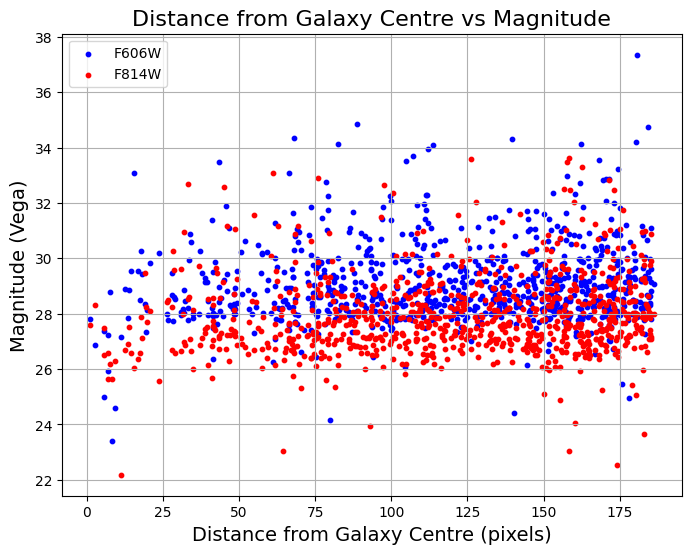

In [12]:
#plotting distance vs magnitude for the objects within re for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f606mag_re0, color='blue', s=10, label='F606W')
plt.scatter(distgal_re0, f814mag_re0, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [150]:
# normalising the distance in terms of re
distgal_re0_n = distgal_re0/re_pixels0

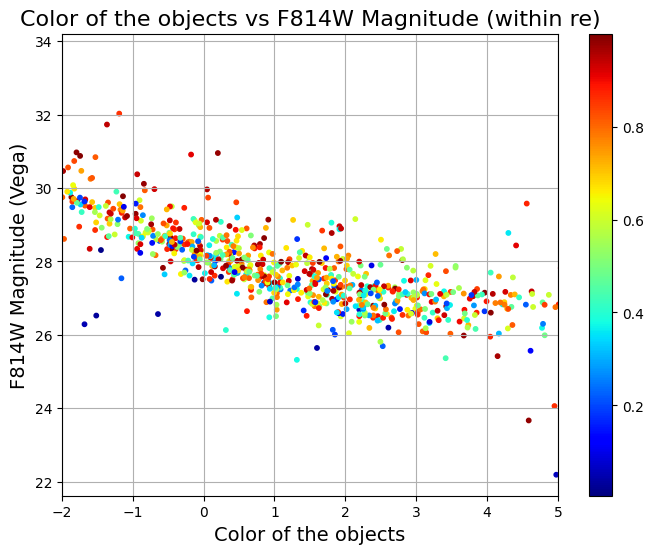

In [151]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color0, f814mag_re0, c = distgal_re0_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [152]:
#Converting into absolute Mag
distgalpc0 = 11.1 * 1e6
absmag_re0 = f814mag_re0 - 5*np.log10(distgalpc0/10)

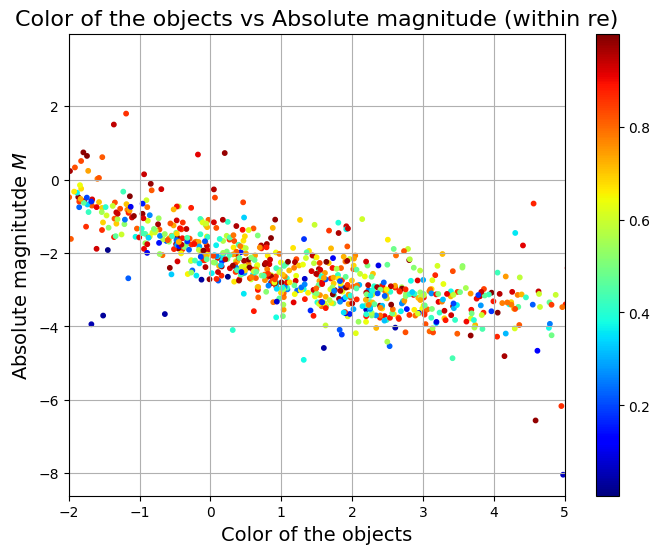

In [153]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color0, absmag_re0, c = distgal_re0_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [119]:
#finding the mag of the object in 0.2 re
repixelsp20 = re_pixels0 * 0.2
print(repixelsp20)
f814mag_rep20 = f814mag0[distgal0 <= repixelsp20]

37.24000000000002


In [126]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re0)# 1 re
max_mag_diff(f814mag_rep20)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 0.036000000000001364
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.11500000000000199
 The magnitude difference between the brightest and 2nd brightest object is 1.7319999999999958
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.6730000000000018


# Finding NSC for SMDG0239126-080826(ID = 3)

In [16]:
galcenx3_l = 1254.3993890460833
galceny3_l = 1678.3210825168053
galcenx3_r = 2956.030359976996
galceny3_r = 2537.341111141835 
cut_cat3 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/3_SMDG0239126-080826_cut_catalog.csv')

In [17]:
# converting re(arcsec) to pixels
re_arcsec3 = 11.72

hdul3 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_3_F814/MAST_2025-11-09T23_10_48.561Z/HST/jdz504020_drc.fits')
if len(hdul3) > 1:
    hdr3 = hdul3[1].header
else:
    hdr3 = hdul3[0].header
wcs3 = WCS(hdr3)
pixel_scale_degrees3 = proj_plane_pixel_scales(wcs3)
scale_arcsec_per_pixel3 = pixel_scale_degrees3[0] * 3600
scale_pixel_per_arcsec3 = 1 / scale_arcsec_per_pixel3
re_pixels3 = re_arcsec3 * scale_pixel_per_arcsec3
print(re_pixels3)

234.40000000000427


In [18]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal3 = cut_cat3['xc'].to_numpy()
ycgal3 = cut_cat3['yc'].to_numpy()
f606mag3 = cut_cat3['F606W_mag_vega'].to_numpy()
f814mag3 = cut_cat3['F814W_mag_vega'].to_numpy()


In [19]:
#calculating the distance from the centre of the galaxy for each bright object
distgal3_l = np.sqrt((xcgal3 - galcenx3_l)**2 + (ycgal3 - galceny3_l)**2)
distgal3_r = np.sqrt((xcgal3 - galcenx3_r)**2 + (ycgal3 - galceny3_r)**2)


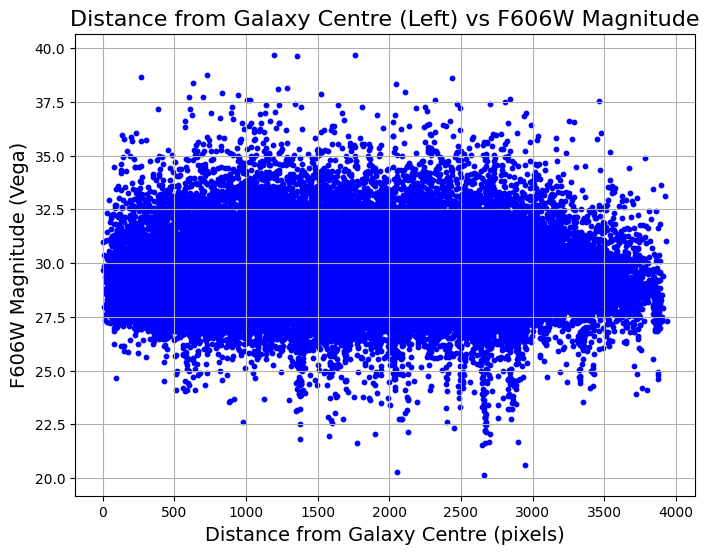

In [20]:
#Potting distance vs magnitude for F606W filter for the left centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f606mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

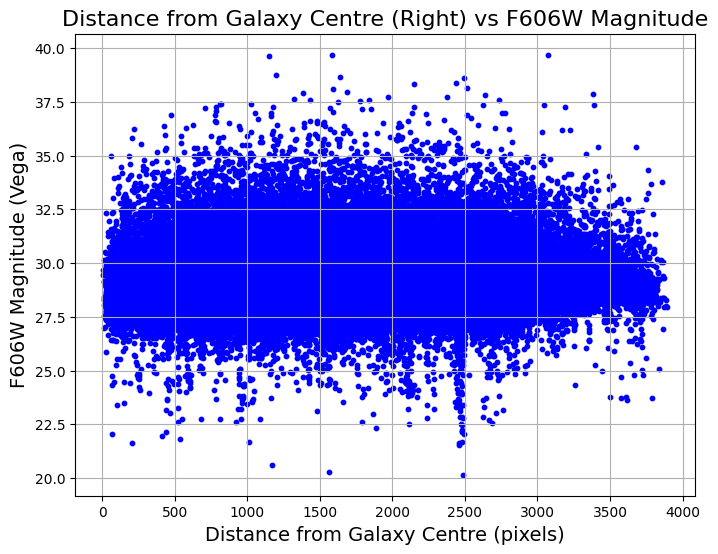

In [21]:
#plotting distance vs magnitude for f606W filter for the right centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_r, f606mag3, color='blue', s=10    )
plt.title('Distance from Galaxy Centre (Right) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

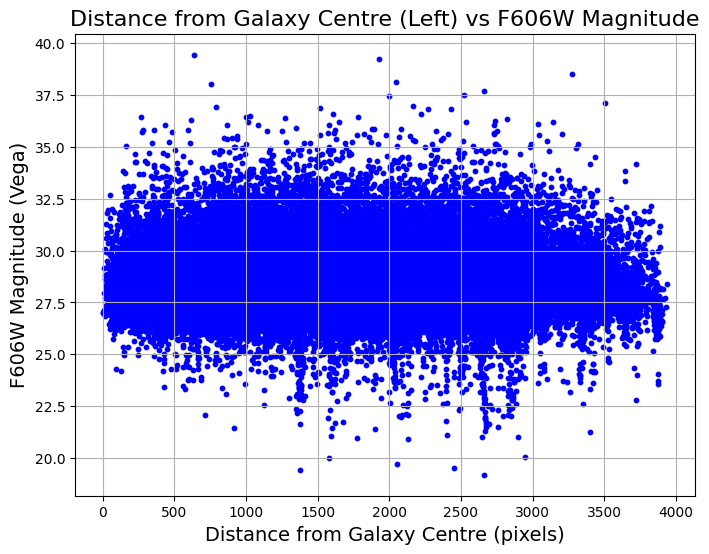

In [22]:
#plotting distance vs magnitude for f814W filter for the left centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f814mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

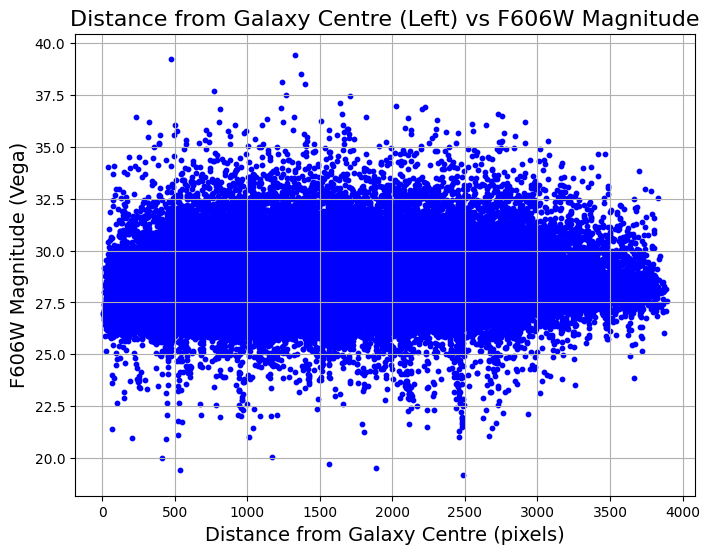

In [23]:
#plotting distance vs magnitude for f814W filter for the right centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_r, f814mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

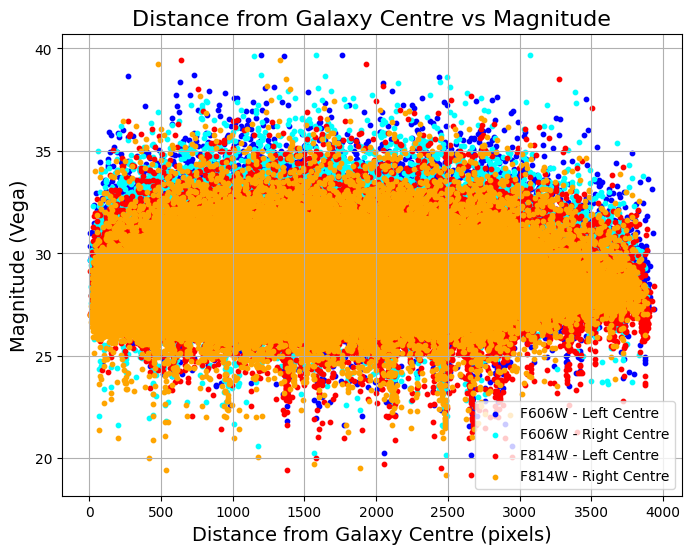

In [24]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f606mag3, color='blue', s=10, label='F606W - Left Centre')
plt.scatter(distgal3_r, f606mag3, color='cyan', s=10, label='F606W - Right Centre')
plt.scatter(distgal3_l, f814mag3, color='red', s=10, label='F814W - Left Centre')
plt.scatter(distgal3_r, f814mag3, color='orange', s=10, label='F814W - Right Centre')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [25]:
# refining the bright object list to only include objects within re and finding the color of the objects
distgal_re3_l = distgal3_l[distgal3_l <= re_pixels3]
f606mag_re3_l = f606mag3[distgal3_l <= re_pixels3]
f814mag_re3_l = f814mag3[distgal3_l <= re_pixels3]  
distgal_re3_r = distgal3_r[distgal3_r <= re_pixels3]
f606mag_re3_r = f606mag3[distgal3_r <= re_pixels3]
f814mag_re3_r = f814mag3[distgal3_r <= re_pixels3]
color3_l = f606mag_re3_l - f814mag_re3_l 
color3_r = f606mag_re3_r - f814mag_re3_r 

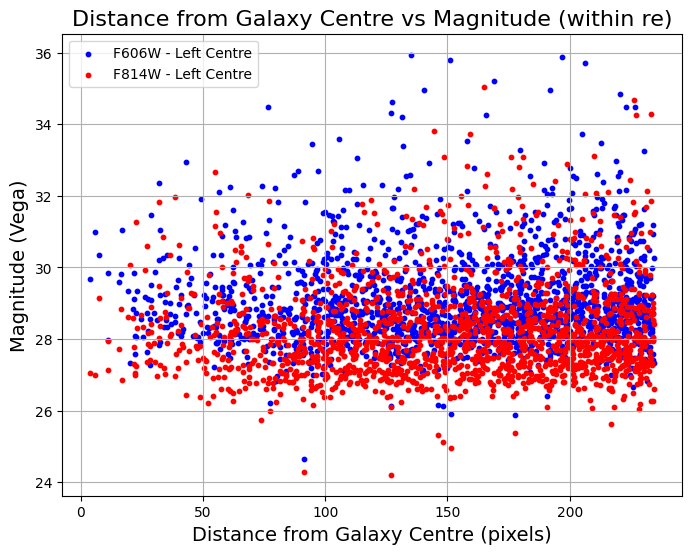

In [26]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re3_l, f606mag_re3_l, color='blue', s=10, label='F606W - Left Centre')
plt.scatter(distgal_re3_l, f814mag_re3_l, color='red', s=10, label='F814W - Left Centre')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()  

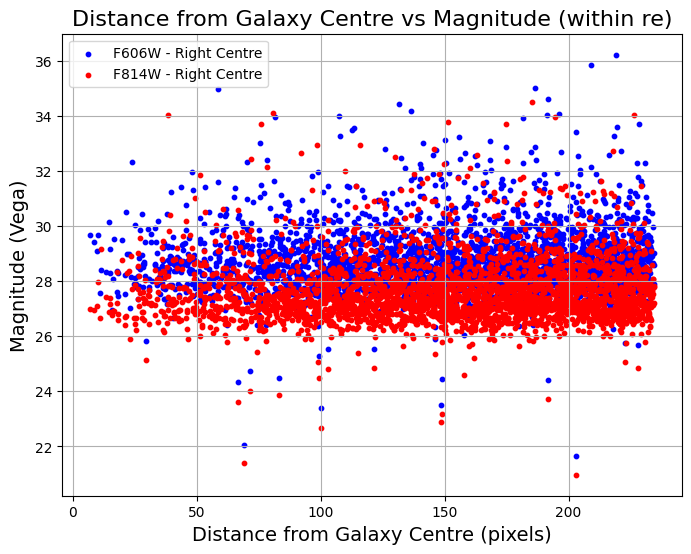

In [27]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re3_r, f606mag_re3_r, color='blue', s=10, label='F606W - Right Centre')
plt.scatter(distgal_re3_r, f814mag_re3_r, color='red', s=10, label='F814W - Right Centre')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()  

In [154]:
# normalising the distance in terms of re
distgal_re3_l_n = distgal_re3_l/re_pixels3
distgal_re3_r_n = distgal_re3_r/re_pixels3

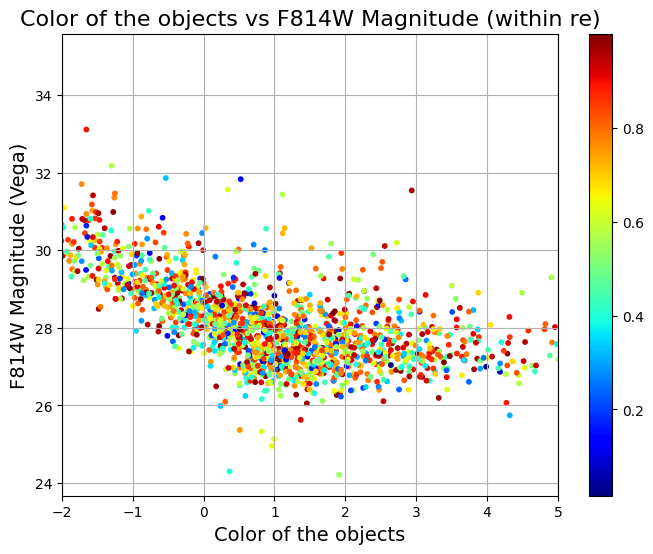

In [155]:
#plotting a color vs magnitude for the objects within a re for left centre
plt.figure(figsize=(8,6))
plt.scatter(color3_l, f814mag_re3_l, c = distgal_re3_l_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


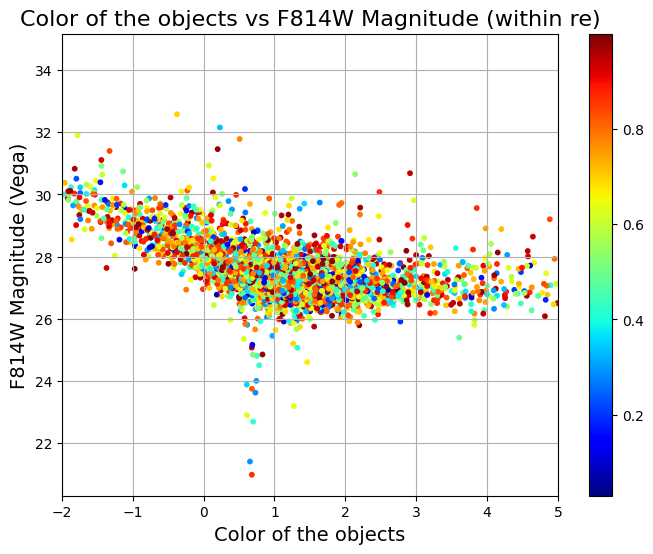

In [157]:
#plotting a color vs magnitude for the objects within a re for right centre
plt.figure(figsize=(8,6))
plt.scatter(color3_r, f814mag_re3_r, c = distgal_re3_r_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [30]:
#Converting into absolute Mag
distgalpc3 = 17.1 * 1e6
absmag_re3_r = f814mag_re3_r - 5*np.log10(distgalpc0/10)
absmag_re3_l = f814mag_re3_l - 5*np.log10(distgalpc0/10)

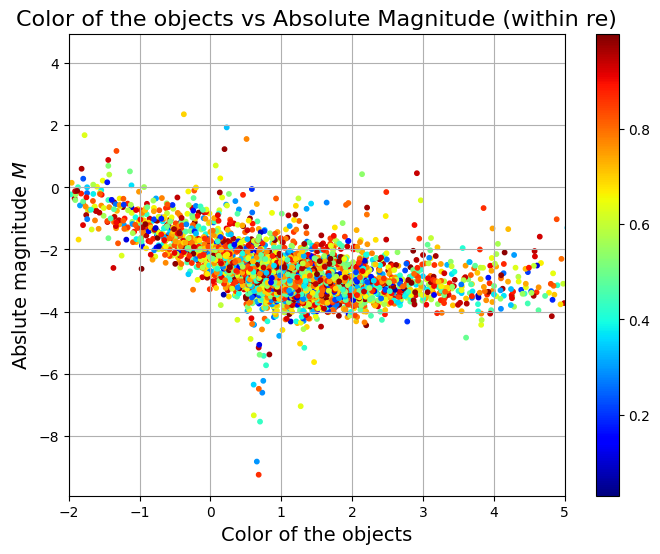

In [158]:
#plotting a color vs magnitude for the objects within a re for left centre
plt.figure(figsize=(8,6))
plt.scatter(color3_r, absmag_re3_r, c = distgal_re3_r_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Abslute magnitude $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

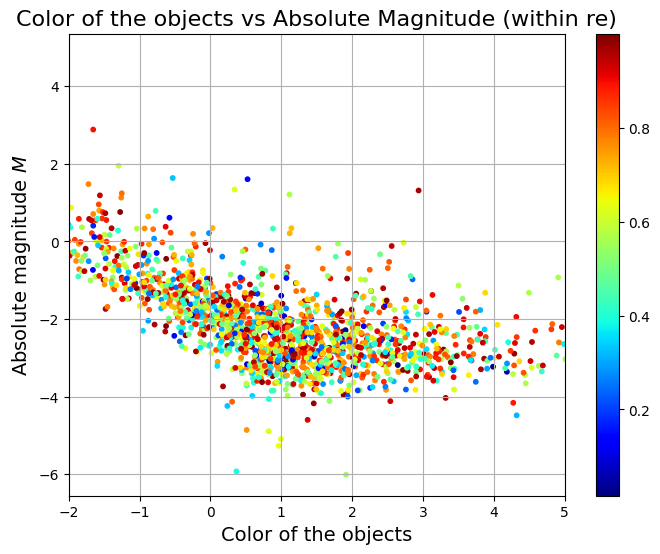

In [159]:
#plotting a color vs magnitude for the objects within a re for left centre
plt.figure(figsize=(8,6))
plt.scatter(color3_l, absmag_re3_l, c = distgal_re3_l_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitude $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [127]:
#finding the mag of the object in 0.2 re for l
repixelsp23 = re_pixels3 * 0.2
print(repixelsp23)
f814mag_rep23_l = f814mag3[distgal3_l <= repixelsp23]
f814mag_rep23_r = f814mag3[distgal3_r <= repixelsp23]

46.880000000000855


In [128]:
#Finding the mag difference of objects in 1 re then 0.2 re for l
max_mag_diff(f814mag_re3_l)# 1 re
max_mag_diff(f814mag_rep23_l)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 0.3639999999999972
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.3950000000000031
 The magnitude difference between the brightest and 2nd brightest object is 0.13700000000000045
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.5629999999999988


In [129]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re3_r)# 1 re
max_mag_diff(f814mag_rep23_r)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 0.40099999999999625
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.04200000000000159
 The magnitude difference between the brightest and 2nd brightest object is 3.6389999999999993
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.21699999999999875


# Finding NSC for SMDG1215513+473253(ID = 25)

In [33]:
galcenx25 = 3347.565661931523
galceny25 = 3343.9503901226444
cut_cat25 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/25_SMDG1215513+473253_cut_catalog.csv')

In [34]:
#converting re(arcsec) to pixels
re_arcsec25 = 10.34

hdul25 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_25_F606/MAST_2025-11-10T20_44_12.230Z/HST/jd5h21010_drc.fits')
if len(hdul25) > 1:
    hdr25 = hdul25[1].header
else:
    hdr25 = hdul25[0].header
wcs25 = WCS(hdr25)
pixel_scale_degrees25 = proj_plane_pixel_scales(wcs25)
scale_arcsec_per_pixel25 = pixel_scale_degrees25[0] * 3600
scale_pixel_per_arcsec25 = 1 / scale_arcsec_per_pixel25
re_pixels25 = re_arcsec25 * scale_pixel_per_arcsec25
print(re_pixels25)

206.80000000000132


In [35]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal25 = cut_cat25['xc'].to_numpy()
ycgal25 = cut_cat25['yc'].to_numpy()
f606mag25 = cut_cat25['F606W_mag_vega'].to_numpy()
f814mag25 = cut_cat25['F814W_mag_vega'].to_numpy()

In [36]:
#calculating the distance from the centre of the galaxy for each bright object
distgal25 = np.sqrt((xcgal25 - galcenx25)**2 + (ycgal25 - galceny25)**2)

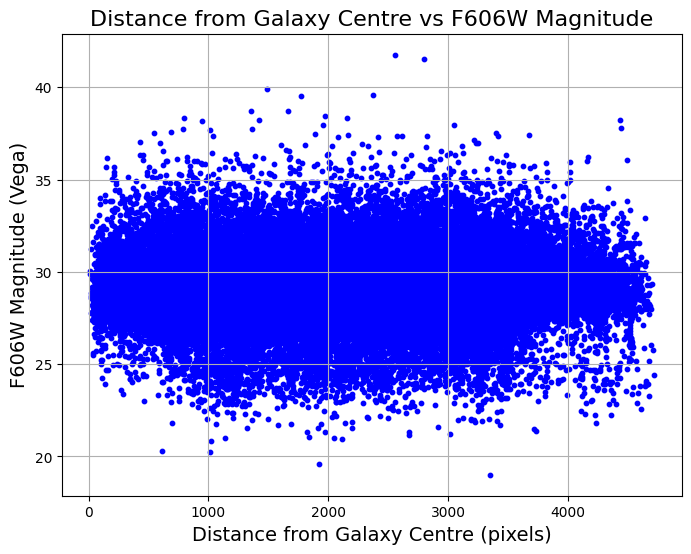

In [37]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f606mag25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

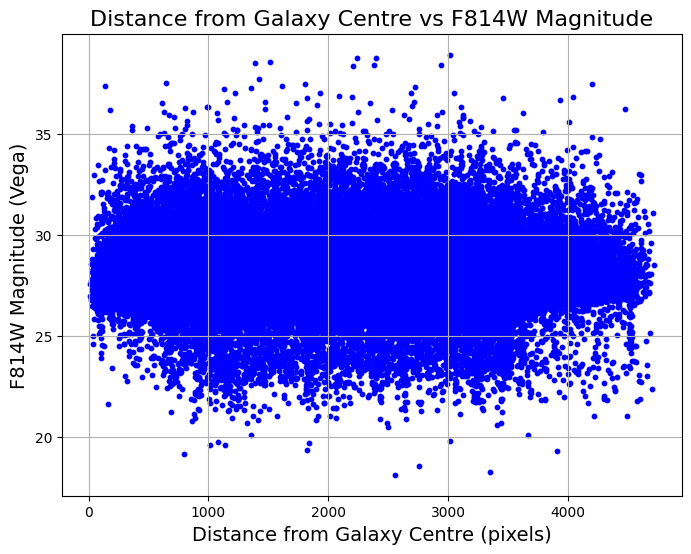

In [38]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f814mag25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show() 

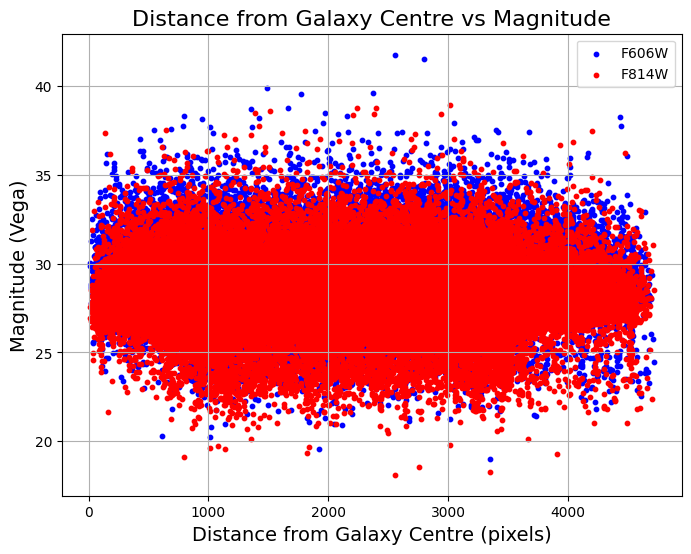

In [39]:
#plotting distance vs magnitude for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f606mag25, color='blue', s=10, label='F606W')
plt.scatter(distgal25, f814mag25, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [40]:
#refining the bright object list to only include objects within re
distgal_re25 = distgal25[distgal25 <= re_pixels25]
f606mag_re25 = f606mag25[distgal25 <= re_pixels25]
f814mag_re25 = f814mag25[distgal25 <= re_pixels25]
color25 = f606mag_re25 - f814mag_re25

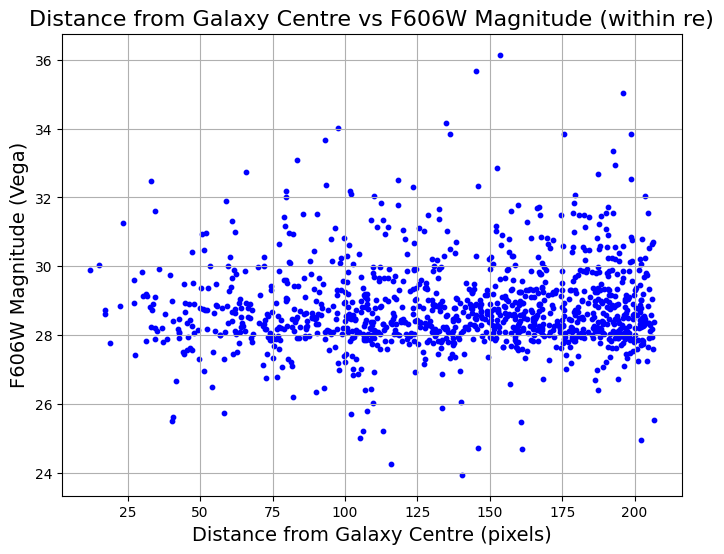

In [41]:
#plotting distance vs magnitude for f606w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f606mag_re25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

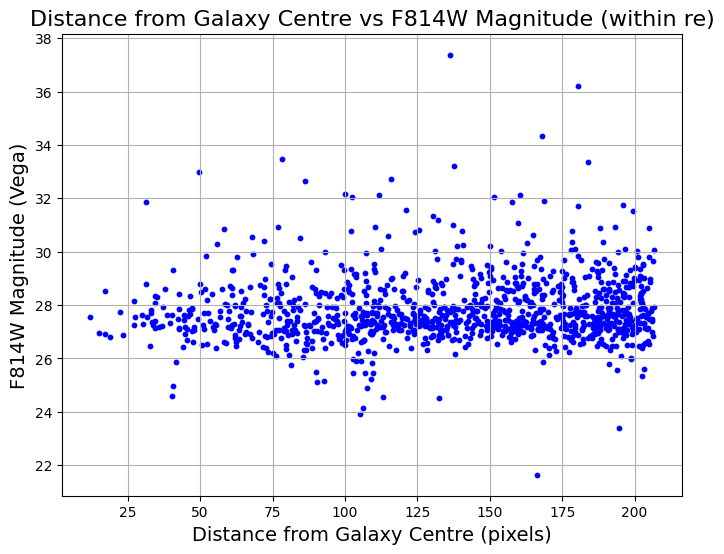

In [42]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f814mag_re25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

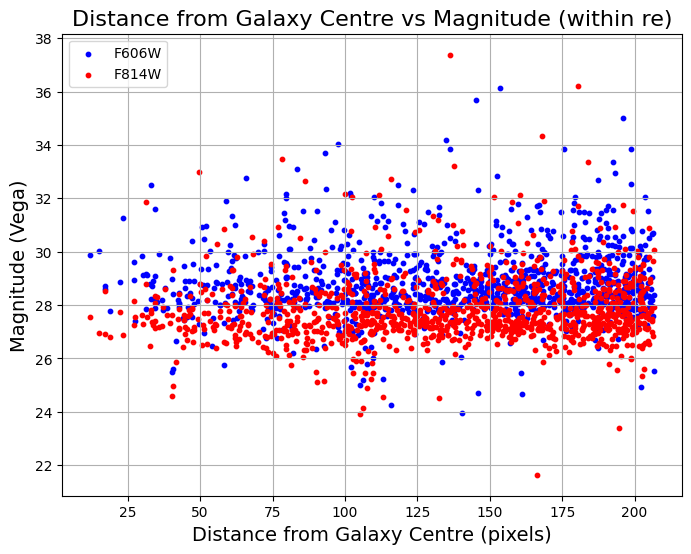

In [43]:
#plotting distance vs magnitude for both filters together within re 
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f606mag_re25, color='blue', s=10, label='F606W')
plt.scatter(distgal_re25, f814mag_re25, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [146]:
# normalising the distance in terms of re
distgal_re25_n = distgal_re25/re_pixels25

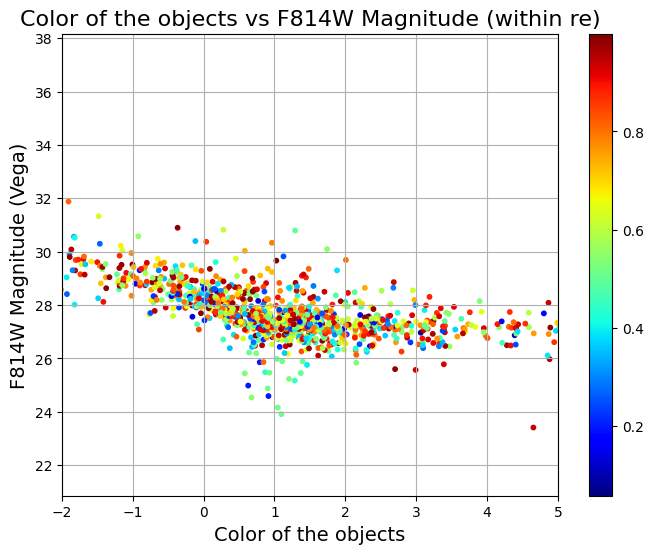

In [147]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color25, f814mag_re25, c = distgal_re25_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [148]:
#Converting into absolute Mag
distgalpc25 = 11.7 * 1e6
absmag_re25 = f814mag_re25 - 5*np.log10(distgalpc0/10)

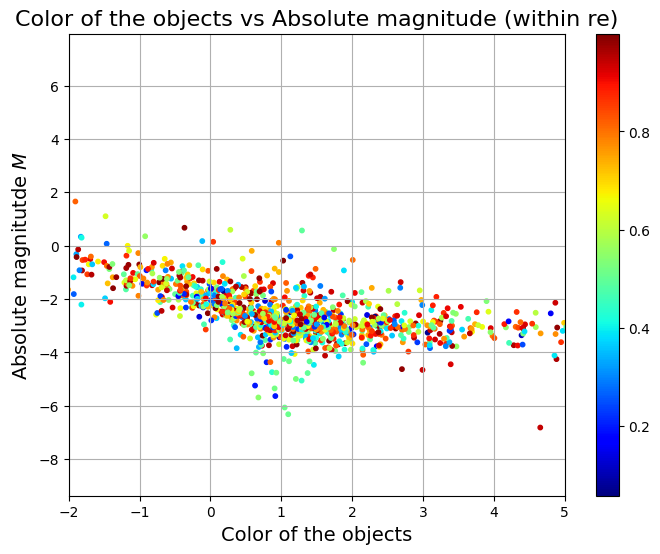

In [149]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color25, absmag_re25, c = distgal_re25_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [118]:
#finding the mag of the object in 0.2 re
repixelsp225 = re_pixels25 * 0.2
print(repixelsp225)
f814mag_rep225 = f814mag25[distgal25 <= repixelsp225]

41.36000000000027


In [125]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re25)# 1 re
max_mag_diff(f814mag_rep225)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 1.186
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 1.8659999999999997
 The magnitude difference between the brightest and 2nd brightest object is 2.5690000000000026
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.504999999999999


# Finding NSC for SMDG1257009+273155(ID = 48)

In [47]:
galcenx48 = 2220.5277730257553
galceny48 = 3410.9924579559433
cut_cat48 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/48_SMDG1257009+273155_cut_catalog.csv')

In [48]:
#converting re(arcsec) to pixels
re_arcsec48 = 5.32

hdul48 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_48_F814/MAST_2025-11-10T21_05_40.326Z/HST/j9ty55030_drc.fits')
if len(hdul48) > 1:
    hdr48 = hdul48[1].header
else:
    hdr48 = hdul48[0].header
wcs48 = WCS(hdr48)
pixel_scale_degrees48 = proj_plane_pixel_scales(wcs48)
scale_arcsec_per_pixel48 = pixel_scale_degrees48[0] * 3600
scale_pixel_per_arcsec48 = 1 / scale_arcsec_per_pixel48
re_pixels48 = re_arcsec48 * scale_pixel_per_arcsec48
print(re_pixels48)

106.4000000000032


In [49]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal48 = cut_cat48['xc'].to_numpy()
ycgal48 = cut_cat48['yc'].to_numpy()
f475mag48 = cut_cat48['F475W_mag_vega'].to_numpy()
f814mag48 = cut_cat48['F814W_mag_vega'].to_numpy()

In [50]:
#calculating the distance from the centre of the galaxy for each bright object
distgal48 = np.sqrt((xcgal48 - galcenx48)**2 + (ycgal48 - galceny48)**2)

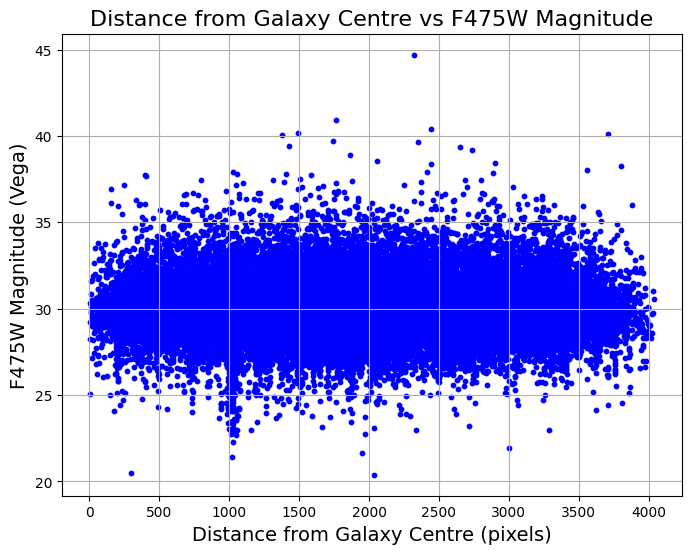

In [51]:
#plotting distance vs magnitude for f475w
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f475mag48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

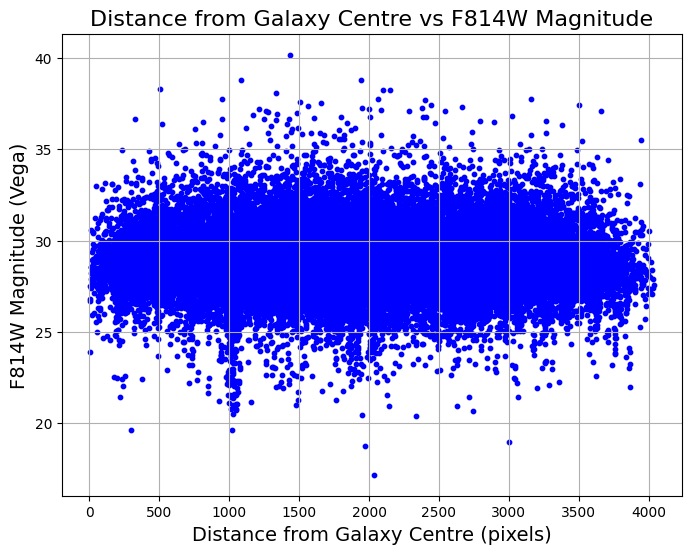

In [52]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f814mag48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

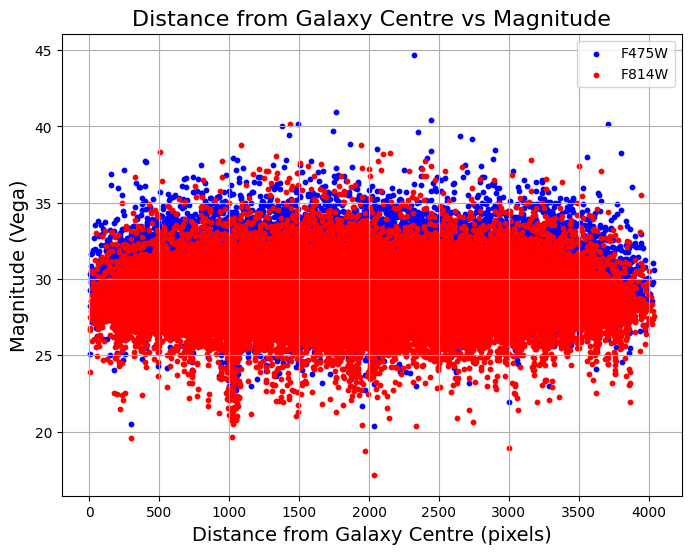

In [53]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f475mag48, color='blue', s=10, label='F475W')
plt.scatter(distgal48, f814mag48, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [54]:
#refining the bright object list to only include objects within re
distgal_re48 = distgal48[distgal48 <= re_pixels48]
f475mag_re48 = f475mag48[distgal48 <= re_pixels48]
f814mag_re48 = f814mag48[distgal48 <= re_pixels48]
color48 = f475mag_re48 - f814mag_re48

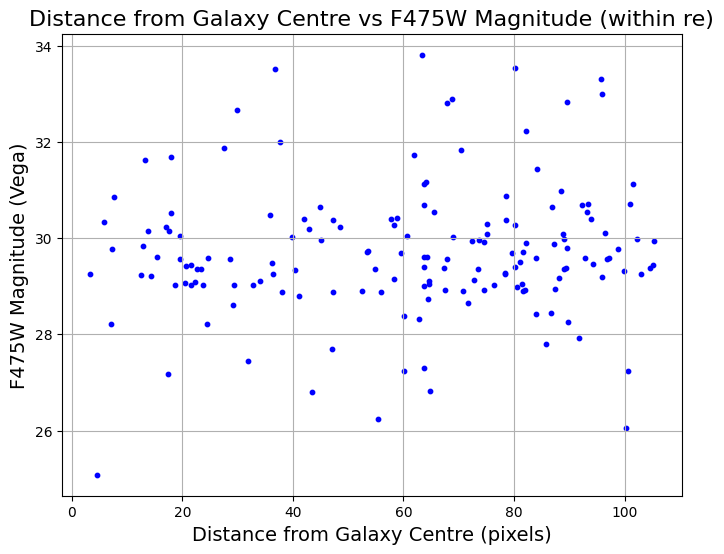

In [55]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f475mag_re48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

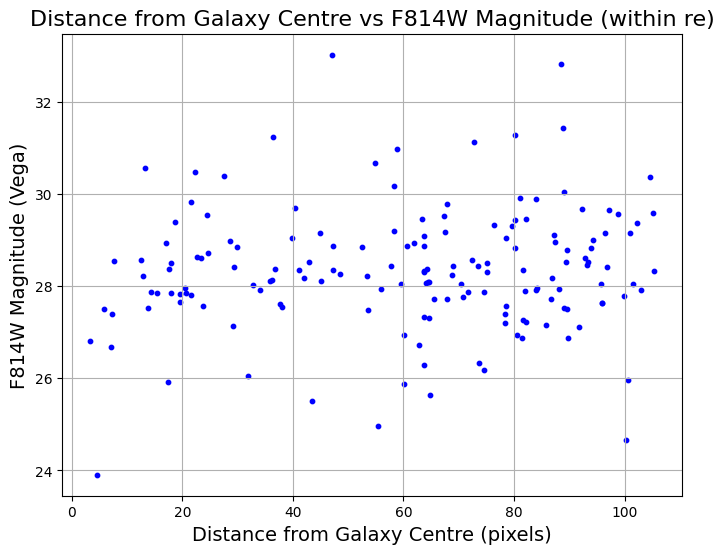

In [56]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f814mag_re48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

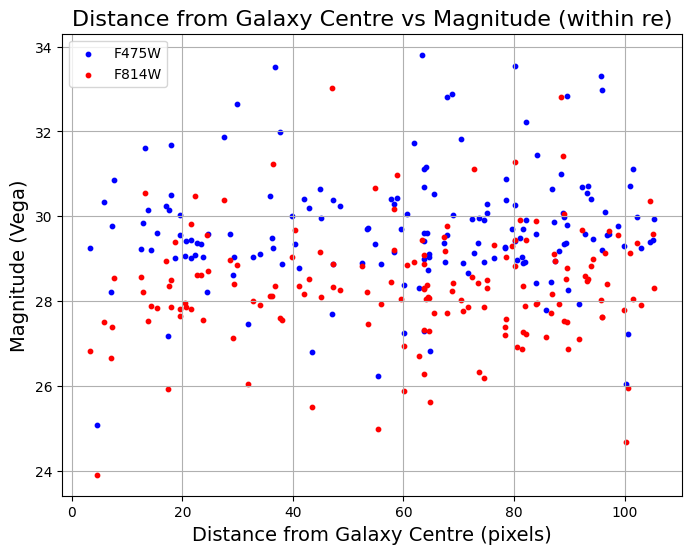

In [57]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f475mag_re48, color='blue', s=10, label='F475W')
plt.scatter(distgal_re48, f814mag_re48, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [142]:
# normalising the distance in terms of re
distgal_re48_n = distgal_re48/re_pixels48

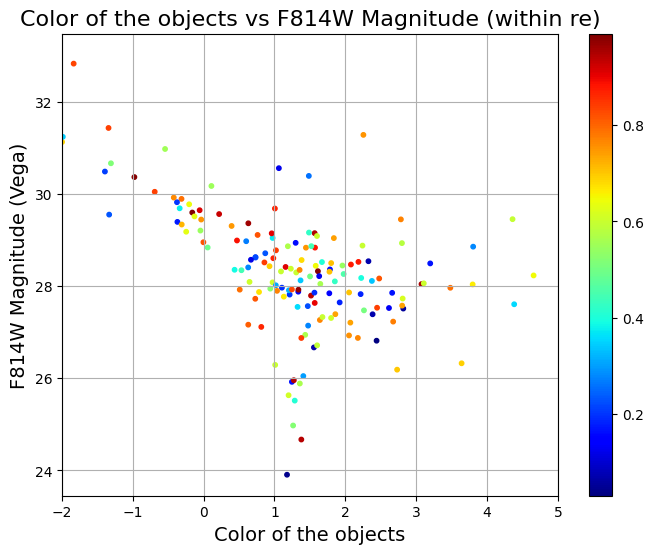

In [143]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color48, f814mag_re48, c = distgal_re48_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [144]:
#Converting into absolute Mag
distgalpc48 = 102.3 * 1e6
absmag_re48 = f814mag_re48 - 5*np.log10(distgalpc0/10)

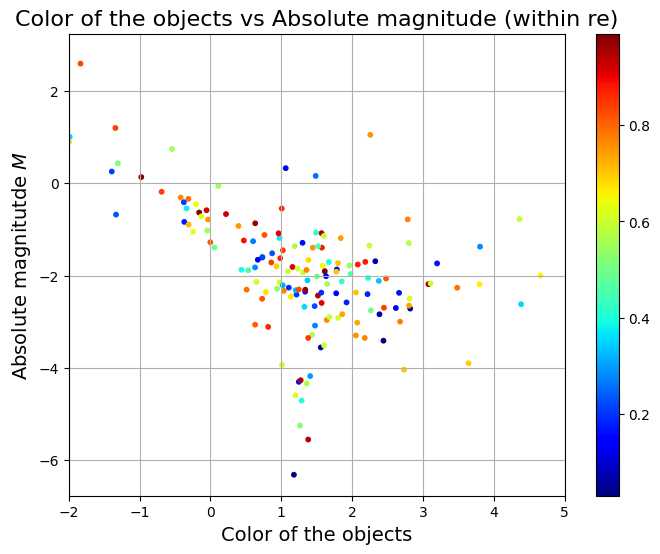

In [145]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color48, absmag_re48, c = distgal_re48_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [120]:
#finding the mag of the object in 0.2 re
repixelsp248 = re_pixels48 * 0.2
print(repixelsp248)
f814mag_rep248 = f814mag48[distgal48 <= repixelsp248]

21.28000000000064


In [124]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re48)# 1 re
max_mag_diff(f814mag_rep248)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 0.19299999999999784
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 1.3950000000000031
 The magnitude difference between the brightest and 2nd brightest object is 1.1649999999999991
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.4540000000000006


# Finding NSC for SMDG1301191+270315(ID = 52)

In [61]:
galcenx52 = 2176.235139120869 
galceny52 = 2555.8847524773632
cut_cat52 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/52_SMDG1301191+270315_cut_catalog.csv')

In [62]:
#converting re(arcsec) to pixels
re_arcsec52 = 5.67

hdul52 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_52_F606/MAST_2025-11-11T04_37_34.355Z/HST/jd5g04010_drc.fits')
if len(hdul52) > 1:
    hdr52 = hdul52[1].header
else:
    hdr52 = hdul52[0].header
wcs52 = WCS(hdr52)
pixel_scale_degrees52 = proj_plane_pixel_scales(wcs52)
scale_arcsec_per_pixel52 = pixel_scale_degrees52[0] * 3600
scale_pixel_per_arcsec52 = 1 / scale_arcsec_per_pixel52
re_pixels52 = re_arcsec52 * scale_pixel_per_arcsec52
print(re_pixels52)

113.40000000000066


In [63]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal52 = cut_cat52['xc'].to_numpy()
ycgal52 = cut_cat52['yc'].to_numpy()
f606mag52 = cut_cat52['F606W_mag_vega'].to_numpy()
f814mag52 = cut_cat52['F814W_mag_vega'].to_numpy()

In [64]:
#calculating the distance from the centre of the galaxy for each bright object
distgal52 = np.sqrt((xcgal52 - galcenx52)**2 + (ycgal52 - galceny52)**2)

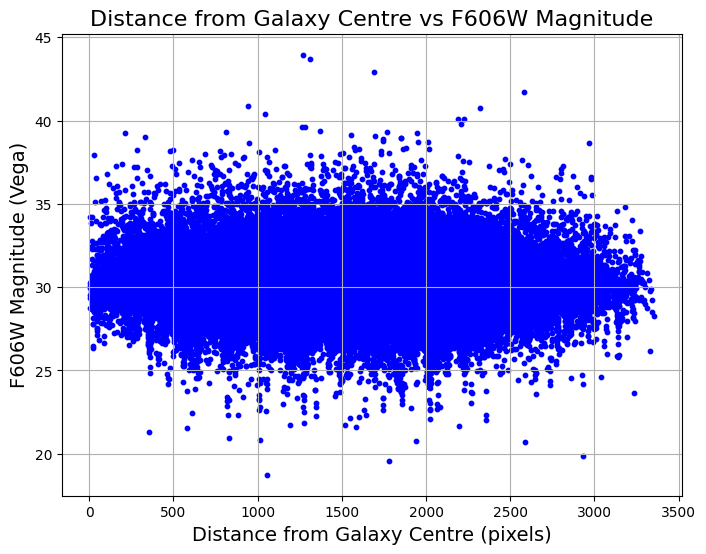

In [65]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f606mag52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

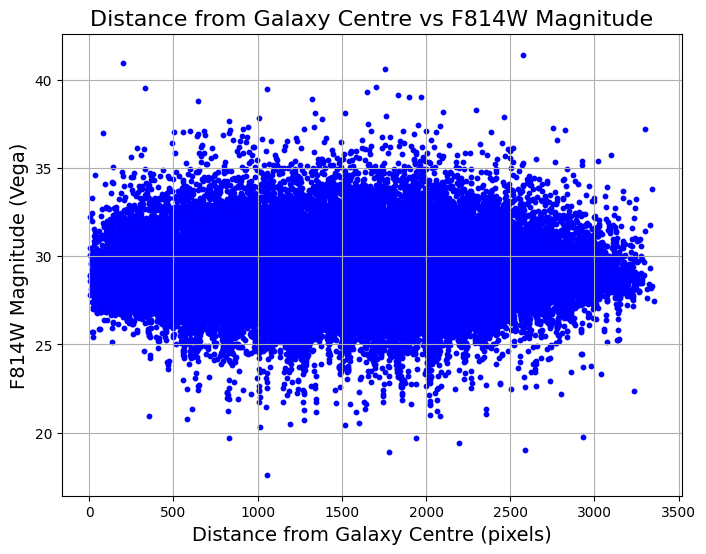

In [66]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f814mag52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

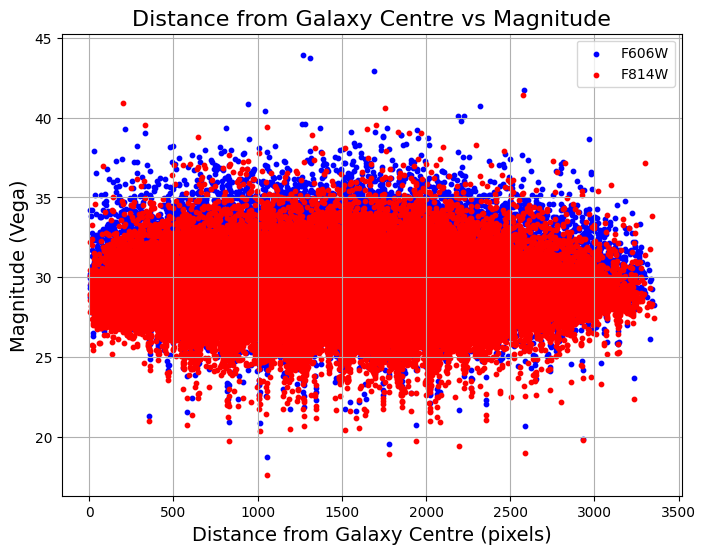

In [67]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f606mag52, color='blue', s=10, label='F606W')
plt.scatter(distgal52, f814mag52, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [68]:
#refining the bright object list to only include objects within re
distgal_re52 = distgal52[distgal52 <= re_pixels52]
f606mag_re52 = f606mag52[distgal52 <= re_pixels52]
f814mag_re52 = f814mag52[distgal52 <= re_pixels52]
color52 = f606mag_re52 - f814mag_re52 

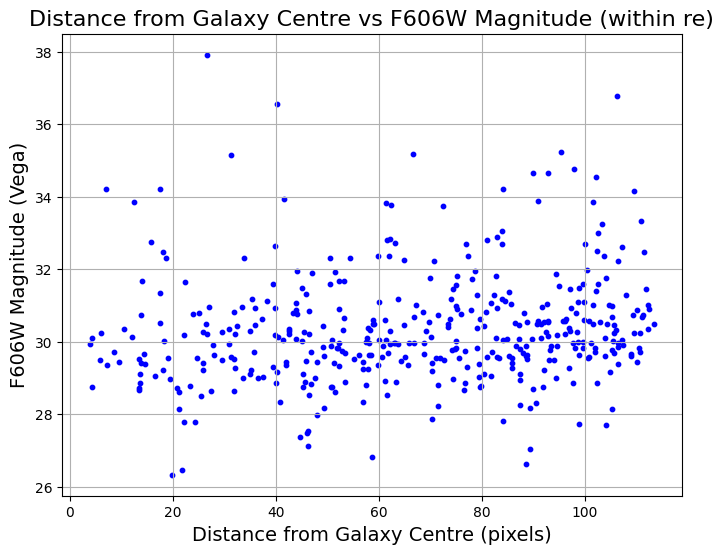

In [69]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f606mag_re52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

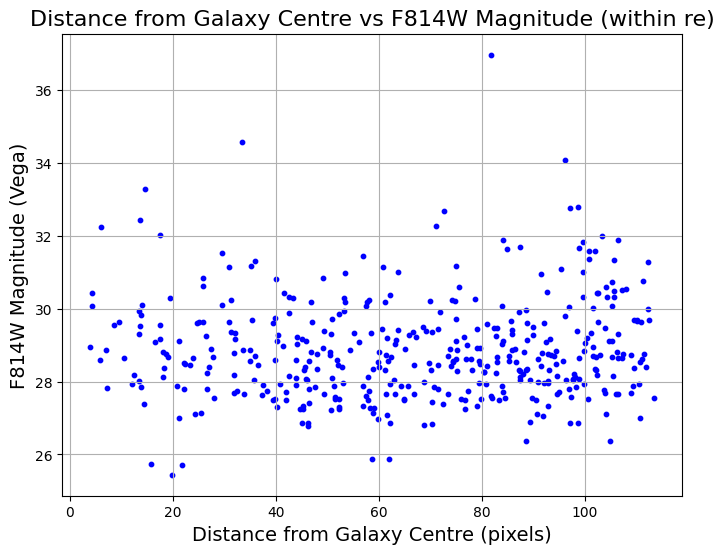

In [70]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f814mag_re52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

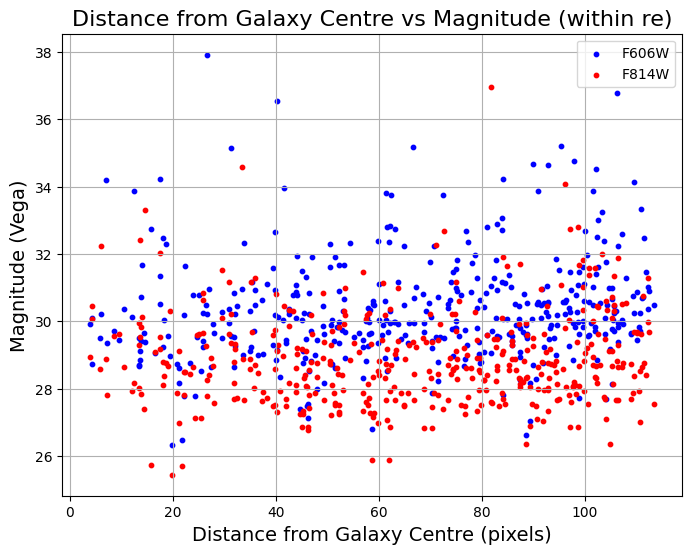

In [71]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f606mag_re52, color='blue', s=10, label='F606W')
plt.scatter(distgal_re52, f814mag_re52, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [138]:
# normalising the distance in terms of re
distgal_re52_n = distgal_re52/re_pixels52

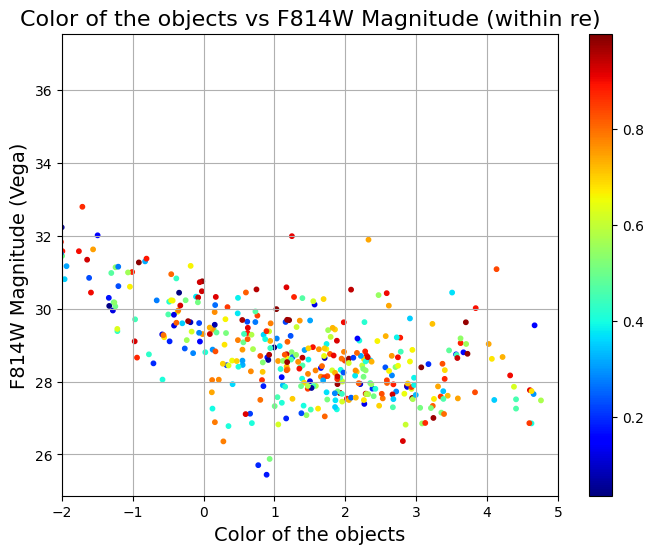

In [139]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color52, f814mag_re52, c = distgal_re52_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [140]:
#Converting into absolute Mag
distgalpc52 = 93 * 1e6
absmag_re52 = f814mag_re52 - 5*np.log10(distgalpc0/10)

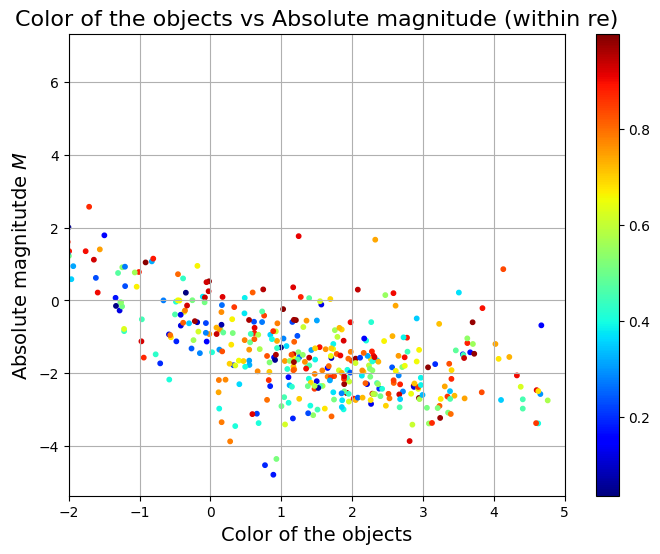

In [141]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color52, absmag_re52, c = distgal_re52_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [121]:
#finding the mag of the object in 0.2 re
repixelsp252 = re_pixels52 * 0.2
print(repixelsp252)
f814mag_rep252 = f814mag52[distgal52 <= repixelsp252]

22.680000000000135


In [122]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re52)# 1 re
max_mag_diff(f814mag_rep252)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 2.392000000000003
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.4959999999999951
 The magnitude difference between the brightest and 2nd brightest object is 0.8729999999999976
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.19300000000000495


# Finding NSC for SMDG1411053-051319(ID = 55)

In [75]:
galcenx55 = 2180.6309804499438
galceny55 = 3161.7931840066067
cut_cat55 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/55_SMDG1411053-051319_cut_catalog.csv')


In [76]:
#converting re(arcsec) to pixels
re_arcsec55 = 18.84

hdul55 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_55_F606/MAST_2025-11-11T04_33_41.543Z/HST/jece78010_drc.fits')
if len(hdul55) > 1:
    hdr55 = hdul55[1].header
else:
    hdr55 = hdul55[0].header
wcs55 = WCS(hdr55)
pixel_scale_degrees55 = proj_plane_pixel_scales(wcs55)
scale_arcsec_per_pixel55 = pixel_scale_degrees55[0] * 3600
scale_pixel_per_arcsec55 = 1 / scale_arcsec_per_pixel55
re_pixels55 = re_arcsec55 * scale_pixel_per_arcsec55
print(re_pixels55)

376.8000000000028


In [77]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal55 = cut_cat55['xc'].to_numpy()
ycgal55 = cut_cat55['yc'].to_numpy()
f606mag55 = cut_cat55['F606W_mag_vega'].to_numpy()
f814mag55 = cut_cat55['F814W_mag_vega'].to_numpy()

In [78]:
#calculating the distance from the centre of the galaxy for each bright object
distgal55 = np.sqrt((xcgal55 - galcenx55)**2 + (ycgal55 - galceny55)**2)

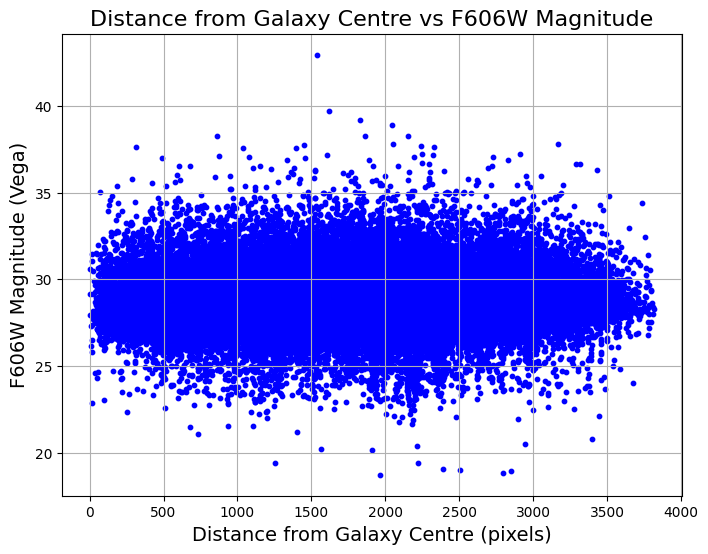

In [79]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f606mag55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

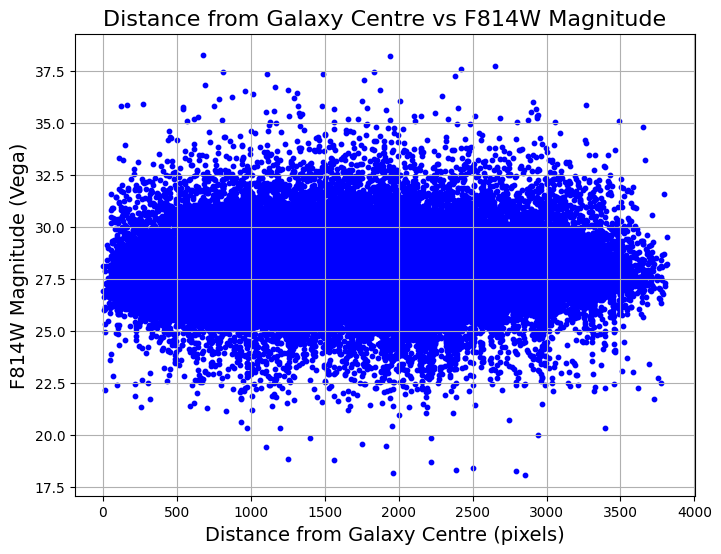

In [80]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f814mag55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

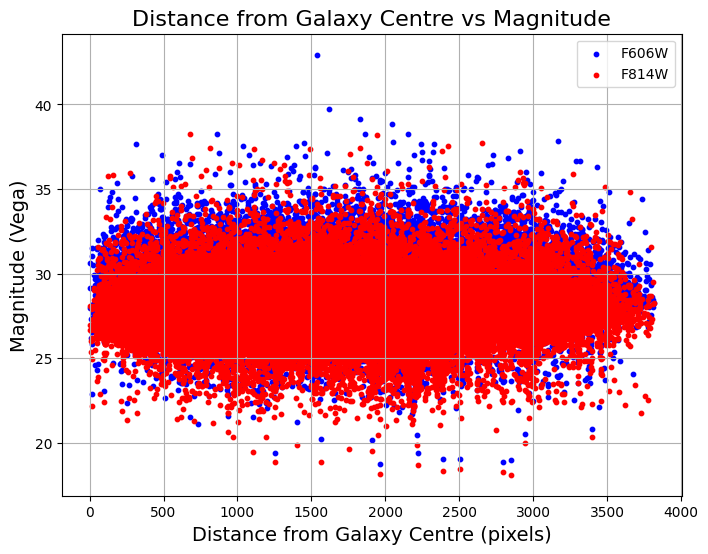

In [81]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f606mag55, color='blue', s=10, label='F606W')
plt.scatter(distgal55, f814mag55, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [82]:
#refining the bright object list to only include objects within re
distgal_re55 = distgal55[distgal55 <= re_pixels55]
f606mag_re55 = f606mag55[distgal55 <= re_pixels55]
f814mag_re55 = f814mag55[distgal55 <= re_pixels55]
color55 = f606mag_re55 - f814mag_re55

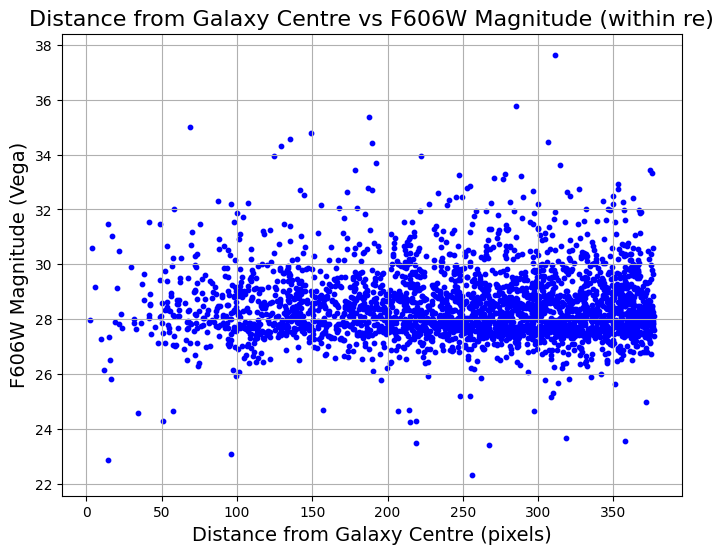

In [83]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f606mag_re55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

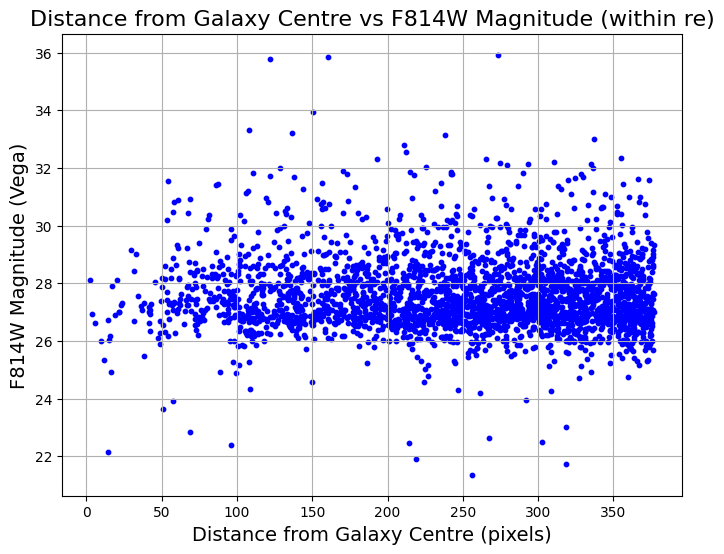

In [84]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f814mag_re55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

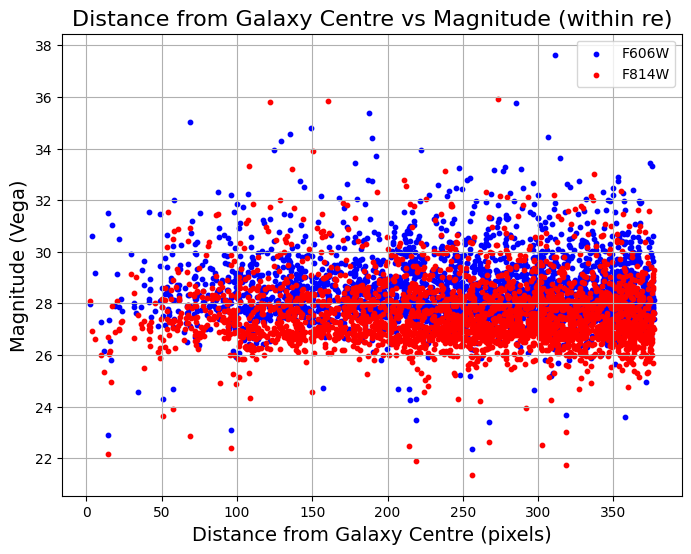

In [85]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f606mag_re55, color='blue', s=10, label='F606W')
plt.scatter(distgal_re55, f814mag_re55, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [133]:
# normalising the distance in terms of re
distgal_re55_n = distgal_re55/re_pixels55

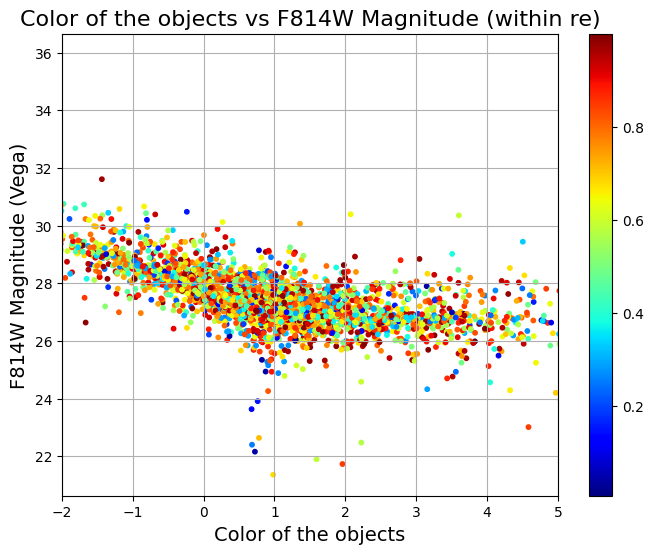

In [137]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color55, f814mag_re55, c = distgal_re55_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [87]:
#Converting into absolute Mag
distgalpc55 = 34.7 * 1e6
absmag_re55 = f814mag_re55 - 5*np.log10(distgalpc0/10)

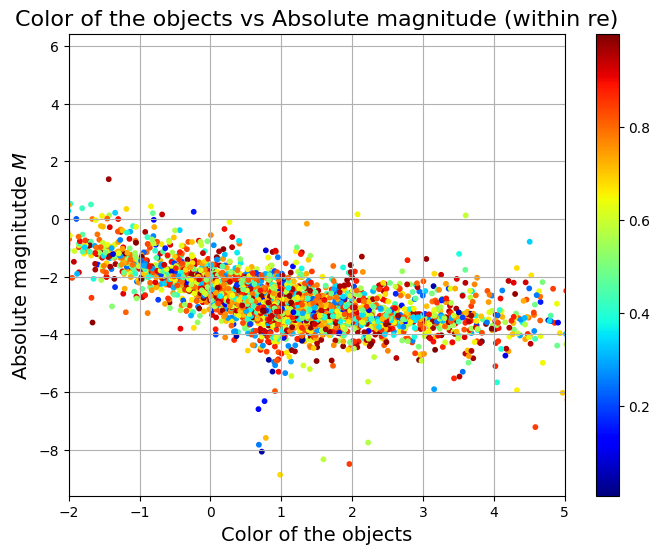

In [135]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color55, absmag_re55, c = distgal_re55_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [115]:
#finding the mag of the object in 0.2 re
repixelsp255 = re_pixels55 * 0.2
print(repixelsp255)
f814mag_rep255 = f814mag55[distgal55 <= repixelsp255]

75.36000000000057


In [123]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re55)# 1 re
max_mag_diff(f814mag_rep255)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 0.07600000000000051
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.05799999999999983
 The magnitude difference between the brightest and 2nd brightest object is 0.6439999999999984
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.019999999999999574


# Finding NSC for SMDG1214055+070631(ID = 77)

In [89]:
galcenx77 = 3275.8978321554605
galceny77 = 1612.9255780512071
cut_cat77 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/77_SMDG1214055+070631_cut_catalog.csv')

In [107]:
#converting re(arcsec) to pixels
re_arcsec77 = 9.29

hdul77 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_77_F475/MAST_2025-11-11T04_46_43.017Z/HST/jc8a05020_drc.fits')
if len(hdul77) > 1:
    hdr77 = hdul77[1].header
else:
    hdr77 = hdul77[0].header
wcs77 = WCS(hdr77)
pixel_scale_degrees77 = proj_plane_pixel_scales(wcs77)
scale_arcsec_per_pixel77 = pixel_scale_degrees77[0] * 3600
scale_pixel_per_arcsec77 = 1 / scale_arcsec_per_pixel77
re_pixels77 = re_arcsec77 * scale_pixel_per_arcsec77
print(re_pixels77)

185.80000000000965


In [91]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal77 = cut_cat77['xc'].to_numpy()
ycgal77 = cut_cat77['yc'].to_numpy()
f475mag77 = cut_cat77['F475W_mag_vega'].to_numpy()
f814mag77 = cut_cat77['F814W_mag_vega'].to_numpy()

In [92]:
#calculating the distance from the centre of the galaxy for each bright object
distgal77 = np.sqrt((xcgal77 - galcenx77)**2 + (ycgal77 - galceny77)**2)

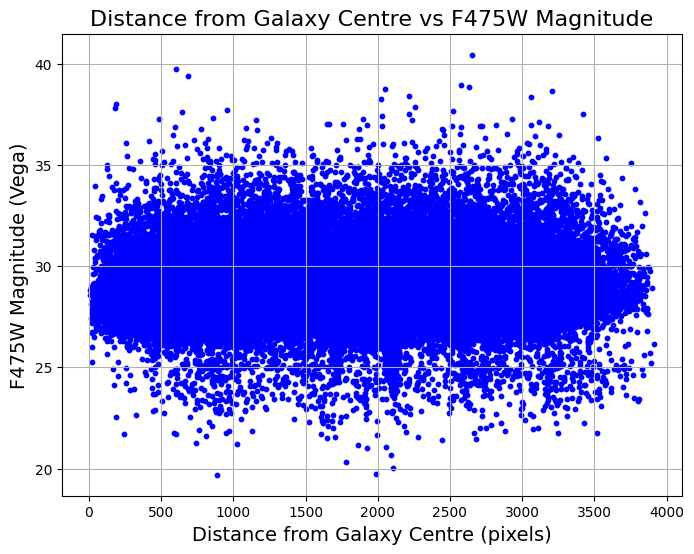

In [93]:
#plotting distance vs magnitude for f475w
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f475mag77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

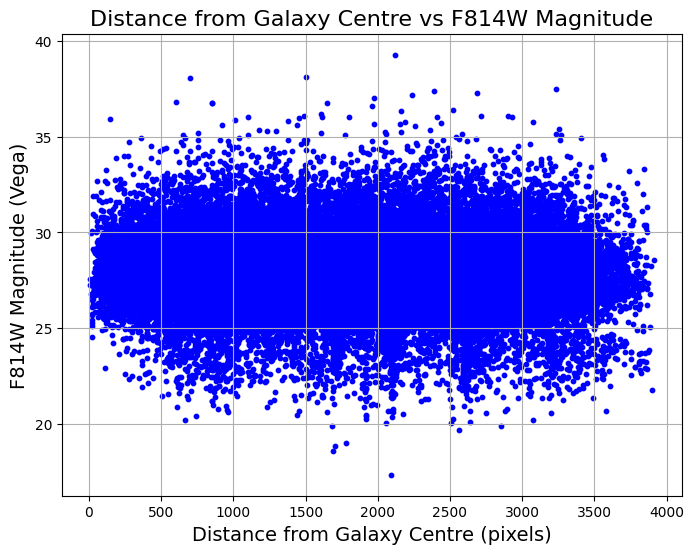

In [94]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f814mag77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

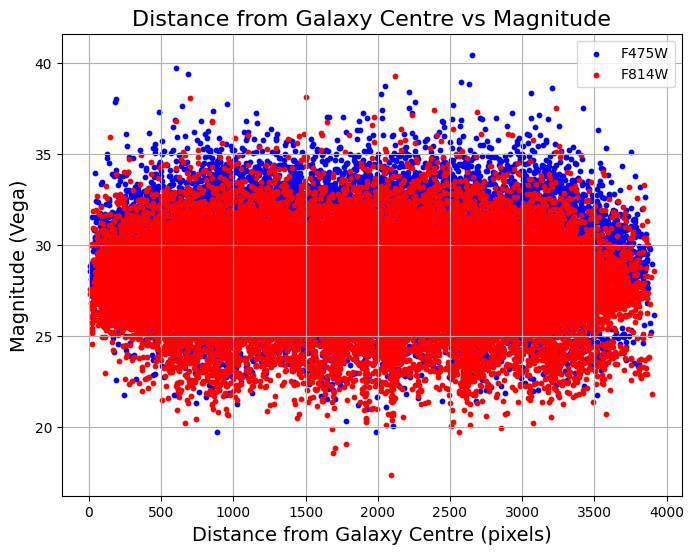

In [95]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f475mag77, color='blue', s=10, label='F475W')
plt.scatter(distgal77, f814mag77, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [96]:
#refining the bright object list to only include objects within re
distgal_re77 = distgal77[distgal77 <= re_pixels77]
f475mag_re77 = f475mag77[distgal77 <= re_pixels77]
f814mag_re77 = f814mag77[distgal77 <= re_pixels77]
color77 = f475mag_re77 - f814mag_re77

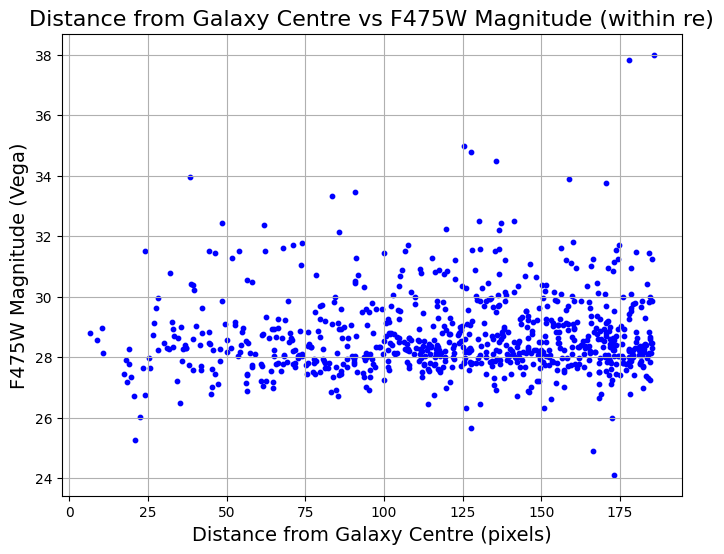

In [97]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f475mag_re77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

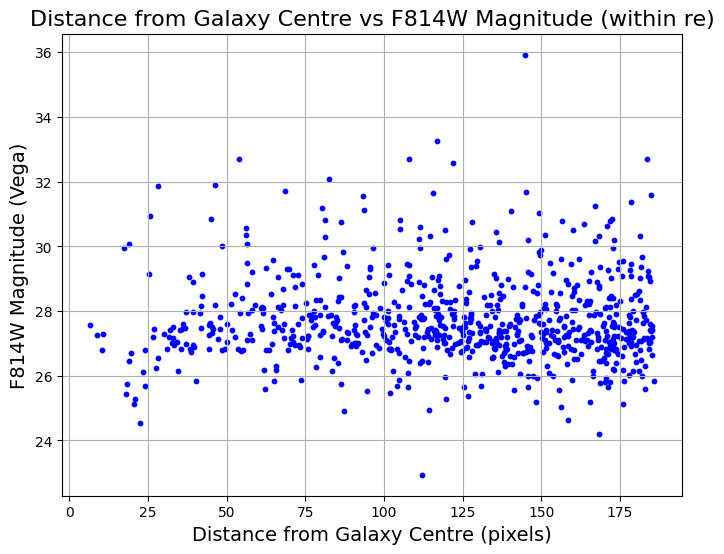

In [98]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f814mag_re77, color = 'blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

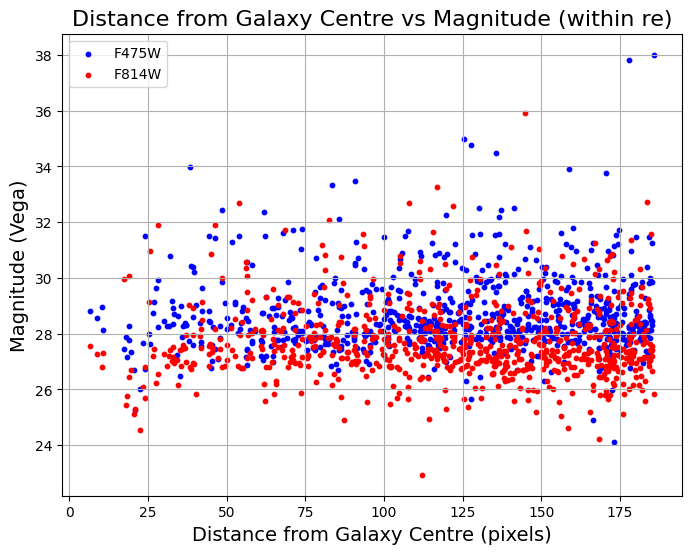

In [99]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f475mag_re77, color='blue', s=10, label='F475W')
plt.scatter(distgal_re77, f814mag_re77, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [130]:
# normalising the distance in terms of re
distgal_re77_n = distgal_re77/re_pixels77

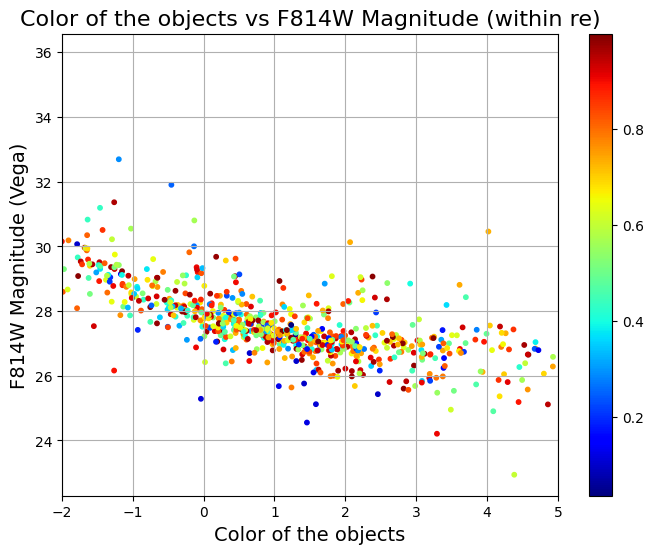

In [131]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color77, f814mag_re77, c = distgal_re77_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [101]:
#Converting into absolute Mag
distgalpc77 = 29.6 * 1e6
absmag_re77 = f814mag_re77 - 5*np.log10(distgalpc0/10)

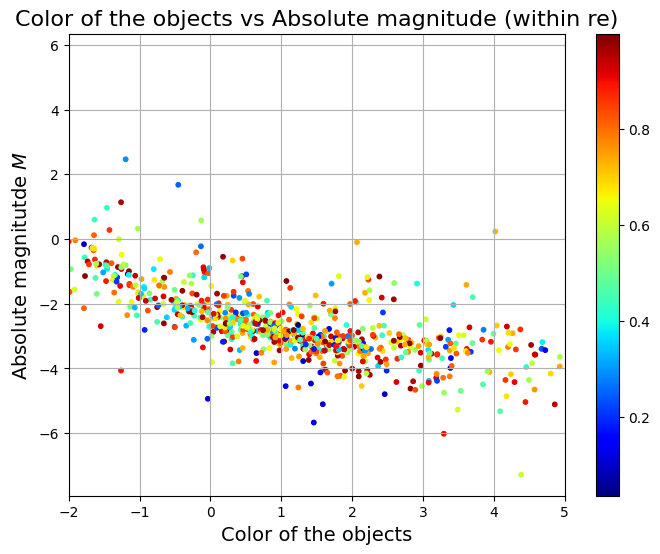

In [132]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color77, absmag_re77, c = distgal_re77_n,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
#finding the mag of the object in 0.2 re
repixelsp277 = re_pixels77 * 0.2
print(repixelsp277)
f814mag_rep277 = f814mag77[distgal77 <= repixelsp277]

37.16000000000193


In [114]:
#Finding the mag difference of objects in 1 re then 0.2 re
max_mag_diff(f814mag_re77)# 1 re
max_mag_diff(f814mag_rep277)# 0.2 re

 The magnitude difference between the brightest and 2nd brightest object is 2.6769999999999996
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.5330000000000013
 The magnitude difference between the brightest and 2nd brightest object is 0.9329999999999998
 The magnitide difference between the 2nd brightest and the 3rd brighest object is 0.8800000000000026
